<a href="https://colab.research.google.com/github/sprihaanvi/ML_HR_Attrition/blob/main/HRAttrition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [184]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [185]:
dataset=pd.read_csv('HRemployee.csv')

In [186]:
dataset.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [187]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

<Axes: xlabel='Attrition', ylabel='count'>

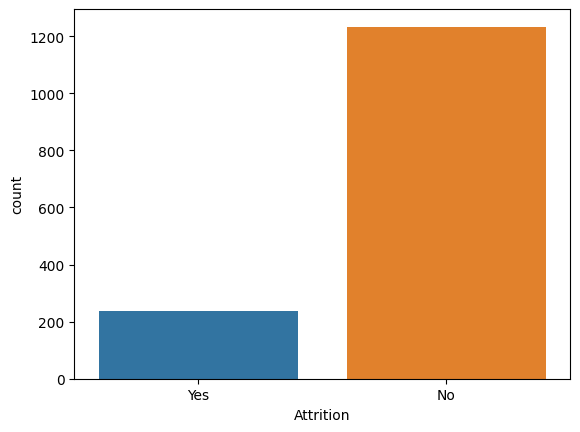

In [188]:
import seaborn as sns
sns.countplot(x='Attrition', data=dataset)


<Axes: xlabel='MaritalStatus', ylabel='count'>

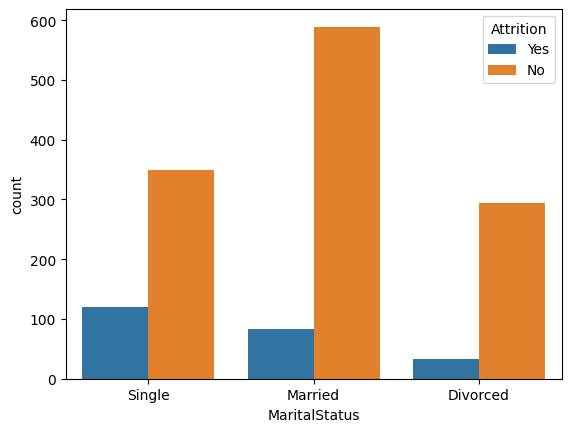

In [189]:
sns.countplot(x='MaritalStatus', hue='Attrition', data=dataset)

<Axes: xlabel='Department', ylabel='count'>

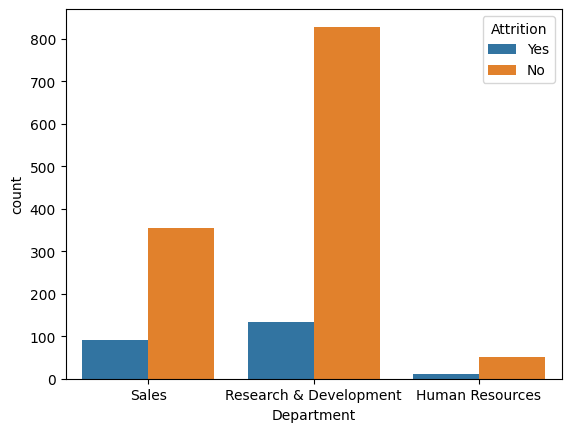

In [190]:
sns.countplot(x='Department', hue='Attrition', data=dataset)

<Axes: xlabel='Gender', ylabel='count'>

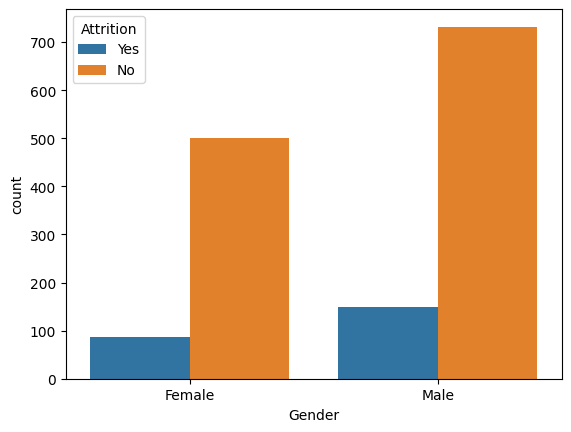

In [191]:
sns.countplot(x='Gender', hue='Attrition', data=dataset)

<Axes: xlabel='Education', ylabel='count'>

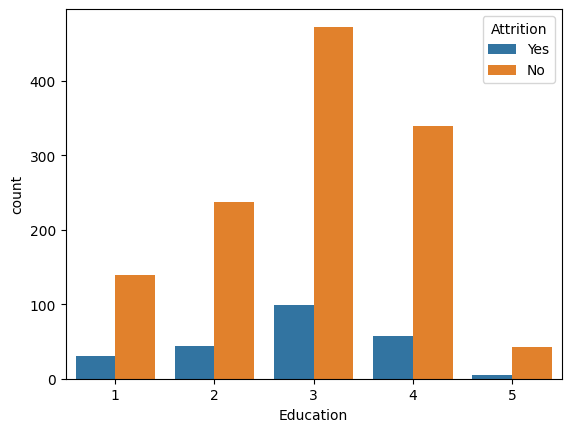

In [192]:
sns.countplot(x='Education', hue='Attrition', data=dataset)


<Axes: >

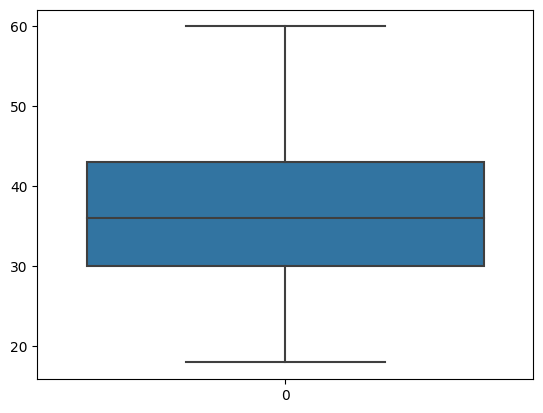

In [193]:
sns.boxplot(dataset['Age'])

<Axes: >

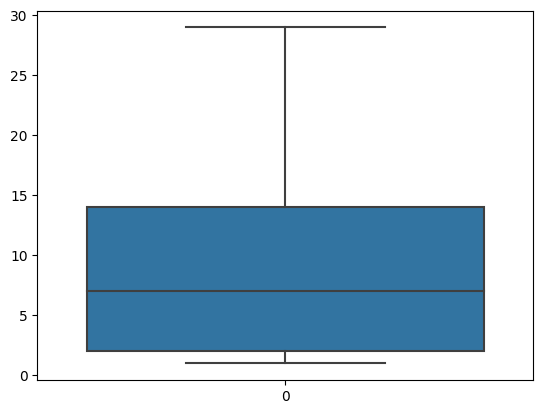

In [194]:
sns.boxplot(dataset['DistanceFromHome'])

In [195]:
from sklearn.preprocessing import LabelEncoder

cols = ['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole','MaritalStatus','Over18','OverTime']
le = LabelEncoder()


dataset[cols] = dataset[cols].apply(LabelEncoder().fit_transform)


In [196]:
y=dataset.iloc[:,1].values



In [197]:
X = dataset.drop(['Attrition','EmployeeCount','Over18','StandardHours'],axis=1)
print(X)

      Age  BusinessTravel  DailyRate  Department  DistanceFromHome  Education  \
0      41               2       1102           2                 1          2   
1      49               1        279           1                 8          1   
2      37               2       1373           1                 2          2   
3      33               1       1392           1                 3          4   
4      27               2        591           1                 2          1   
...   ...             ...        ...         ...               ...        ...   
1465   36               1        884           1                23          2   
1466   39               2        613           1                 6          1   
1467   27               2        155           1                 4          3   
1468   49               1       1023           2                 2          3   
1469   34               2        628           1                 8          3   

      EducationField  Emplo

In [198]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Age                       1470 non-null   int64
 1   BusinessTravel            1470 non-null   int64
 2   DailyRate                 1470 non-null   int64
 3   Department                1470 non-null   int64
 4   DistanceFromHome          1470 non-null   int64
 5   Education                 1470 non-null   int64
 6   EducationField            1470 non-null   int64
 7   EmployeeNumber            1470 non-null   int64
 8   EnvironmentSatisfaction   1470 non-null   int64
 9   Gender                    1470 non-null   int64
 10  HourlyRate                1470 non-null   int64
 11  JobInvolvement            1470 non-null   int64
 12  JobLevel                  1470 non-null   int64
 13  JobRole                   1470 non-null   int64
 14  JobSatisfaction           1470 non-null 

In [199]:
print(y)

['Yes' 'No' 'Yes' ... 'No' 'No' 'No']


In [200]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

In [201]:
print(y)

[1 0 1 ... 0 0 0]


Yes is encoded as 1
and No is encoded as 0

In [202]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_scaled = scaler.fit_transform(X)


X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)


In [203]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.25,random_state=0)

In [204]:
print(X_train)

[[0.23809524 0.         0.98353615 ... 0.44444444 0.46666667 0.29411765]
 [0.30952381 1.         0.84037223 ... 0.         0.         0.        ]
 [0.73809524 1.         0.99355762 ... 0.38888889 0.         0.41176471]
 ...
 [0.5952381  1.         0.77093772 ... 0.5        0.53333333 0.47058824]
 [0.47619048 1.         0.11882606 ... 0.         0.         0.05882353]
 [0.52380952 1.         0.39799571 ... 0.         0.         0.        ]]


In [205]:
print(X_test)

[[0.42857143 0.         0.38153185 ... 0.16666667 0.6        0.41176471]
 [0.35714286 1.         0.33858268 ... 0.16666667 0.         0.11764706]
 [0.4047619  0.5        0.40085898 ... 0.11111111 0.2        0.11764706]
 ...
 [0.54761905 1.         0.11524696 ... 0.72222222 0.13333333 1.        ]
 [0.71428571 1.         0.53901217 ... 0.5        0.         0.47058824]
 [0.30952381 0.5        0.46671439 ... 0.38888889 0.         0.47058824]]


In [206]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(X_train,y_train)

LogisticRegression()

In [207]:
y_pred=lr.predict(X_test)


In [208]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, classification_report


In [209]:
cmlr=confusion_matrix(y_test,y_pred)
print("The confusion  matrix is:")
print(cmlr)
logistic_accuracy = accuracy_score(y_test,y_pred)
logistic_report = classification_report(y_test,y_pred)

print("Logistic Regression Model Accuracy:", logistic_accuracy)
print("Logistic Regression Model Classification Report:")
print(logistic_report)

The confusion  matrix is:
[[307   3]
 [ 38  20]]
Logistic Regression Model Accuracy: 0.8885869565217391
Logistic Regression Model Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.99      0.94       310
           1       0.87      0.34      0.49        58

    accuracy                           0.89       368
   macro avg       0.88      0.67      0.72       368
weighted avg       0.89      0.89      0.87       368



In [210]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()
dtc.fit(X_train, y_train)


DecisionTreeClassifier()

In [211]:
dtc_pred=dtc.predict(X_test)


In [212]:
cmdtc=confusion_matrix(y_test,dtc_pred)
print("The confusion  matrix is:-")
print(cmdtc)
decisiontree_accuracy = accuracy_score(y_test,dtc_pred)
decisiontree_report = classification_report(y_test,dtc_pred)

print("Decision Tree Model Accuracy:", decisiontree_accuracy)
print("Decision Tree Model Classification Report:")
print(decisiontree_report)

The confusion  matrix is:-
[[273  37]
 [ 36  22]]
Decision Tree Model Accuracy: 0.8016304347826086
Decision Tree Model Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.88      0.88       310
           1       0.37      0.38      0.38        58

    accuracy                           0.80       368
   macro avg       0.63      0.63      0.63       368
weighted avg       0.80      0.80      0.80       368



In [213]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=50,criterion='entropy',random_state=42)
rf.fit(X_train,y_train)


RandomForestClassifier(criterion='entropy', n_estimators=50, random_state=42)

In [214]:
rf_pred=rf.predict(X_test)


In [215]:
cmrf=confusion_matrix(y_test,rf_pred)
print("The confusion  matrix is:-")
print(cmrf)
rf_accuracy = accuracy_score(y_test,rf_pred)
rf_report = classification_report(y_test,rf_pred)

print("Random Forest Model Accuracy:", rf_accuracy)
print("Random Forest Model Classification Report:")
print(rf_report)

The confusion  matrix is:-
[[308   2]
 [ 48  10]]
Random Forest Model Accuracy: 0.8641304347826086
Random Forest Model Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.99      0.92       310
           1       0.83      0.17      0.29        58

    accuracy                           0.86       368
   macro avg       0.85      0.58      0.61       368
weighted avg       0.86      0.86      0.82       368

